In [2]:
from enum import auto
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# carregar dados

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados["km_por_ano"] = dados.milhas_por_ano * 1.60934
dados["preco"] = dados.preco / 10000
dados["idade"] = datetime.today().year - dados.ano_do_modelo
dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)

x = dados[["preco", "idade", "km_por_ano"]]
y = dados["vendido"]

len(dados.query("vendido == True")) / len(dados)

0.58

In [9]:
# trabalhar modelo DecisionTreeClassifier
SEED = 20

raw_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

#scaler = StandardScaler()
#scaler.fit(raw_x)

#treino_x = scaler.transform(raw_x)
#teste_x = scaler.transform(raw_teste_x)
treino_x = raw_x
teste_x = raw_teste_x

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 78.40%


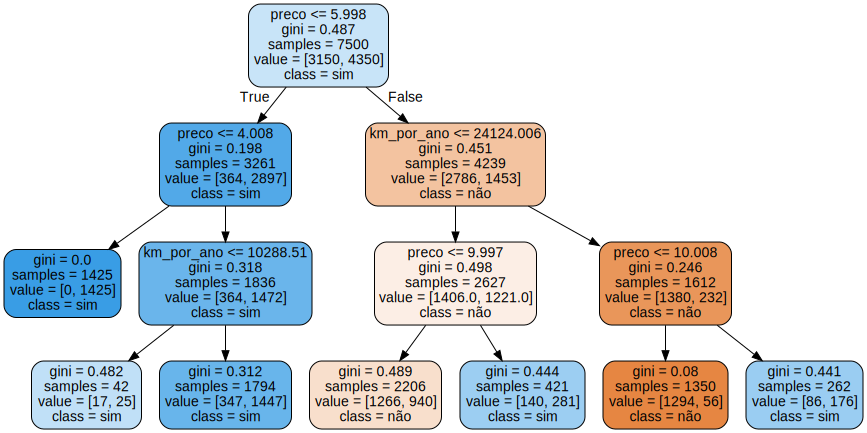

In [10]:
estrutura = export_graphviz(modelo, filled=True, rounded=True, feature_names=x.columns, class_names=["não","sim"])
grafico = graphviz.Source(estrutura)
grafico